In [123]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
import os
import pickle

In [124]:
my_data = genfromtxt('../Data/data_2/covtype.data', delimiter=',')

In [15]:
my_data.shape

(581012, 55)

In [125]:
for i in set(my_data[:,-1]) :
    _list = list(my_data[:,-1])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : 1.0 | count : 211840
Class : 2.0 | count : 283301
Class : 3.0 | count : 35754
Class : 4.0 | count : 2747
Class : 5.0 | count : 9493
Class : 6.0 | count : 17367
Class : 7.0 | count : 20510


In [28]:
# there are 7 classes 
# taking the majority class as normal and the class(es) with minimum number of points as anomalous
# this assumption has been done in CompreX

normal_class = 1
anomaly_class_1 = 4 
anomaly_class_2 = 5

In [19]:
df = pd.DataFrame(data=my_data)
print(list(df.columns))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]


In [127]:
df = df.rename(columns = {54:'tag'})
data_df = df[(df['tag']==normal_class)] 
anom = df[(df['tag']== anomaly_class_1)|(df['tag']==anomaly_class_2)].sample(int(len(data_df)*0.04))
data_df = data_df.append(anom)

In [128]:
len(data_df)

220313

In [129]:
l1 = len(data_df[data_df['tag']==normal_class])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 3.8458919809543697


In [130]:
# add in id
new_col = list(range(1,len(data_df)+1))
data_df.insert(loc=0, column='id', value=new_col)

### Exploring the attributes


In [131]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [132]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    for i in range(1,num_cols-2):
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

In [133]:
attr_entropy = get_entropies(data_df)


1 0.9773444467857112
2 0.8177691507727548
3 0.7866949335922656
4 0.792960451975529
5 0.955968342680144
6 0.8527315673834043
7 0.8307843212467241
8 0.9040954231258223
9 0.9122773404972147
10 0.9997979630313271
11 0.41750530624084253
12 0.9791796532227676
13 0.07208577366717682
14 0.006936549650709587
15 0.013444989118837404
16 0.03120502433369651
17 0.03165529884077621
18 0.002348230372698051
19 0.011709539526396844
20 0
21 0.0026867040858765488
22 0.008667358732380311
23 0.051744930442037256
24 0.05015820964183601
25 0.09519722638228624
26 0.10715352210028091
27 0.006046659912590714
28 0
29 0.0308287743724647
30 0.03944647870512452
31 0.009325453021437464
32 0.08965785821093814
33 0.12447814823416645
34 0.03480827297363503
35 0.5207599532744404
36 0.642818490848403
37 0.29013253085691726
38 0.006936549650709587
39 0.018193898458121895
40 0.027282591638744174
41 0.0031843176204727594
42 0.7093379347040475
43 0.24795495379558127
44 0.3064630476576524
45 0.4637899554521457
46 0.4162864601

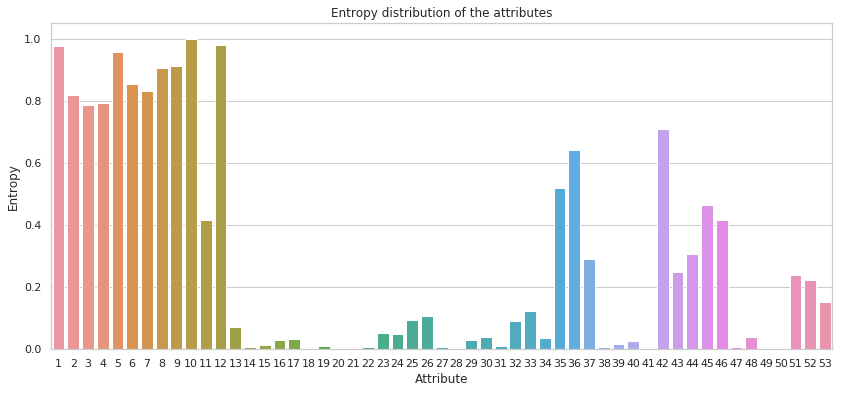

In [134]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [135]:

lb = 0.02
ub = 0.98
attr_list = []
for k,v in attr_entropy.items():
    if v >= lb and v<= ub:
        attr_list.append(k)
        

In [136]:
len(attr_list)

36

In [137]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [138]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

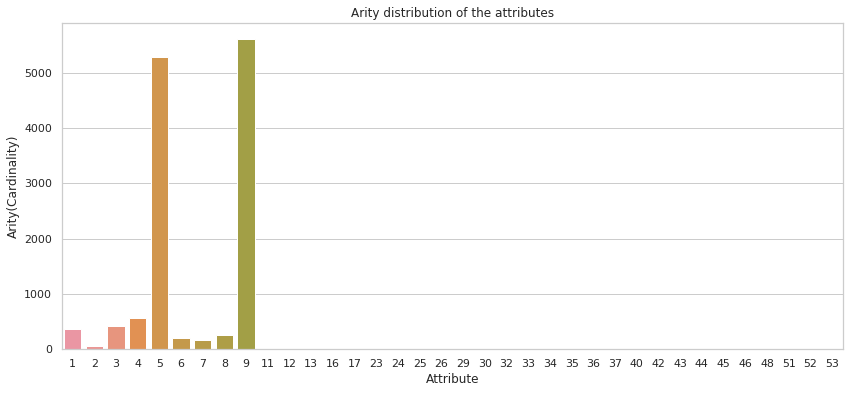

In [148]:

domain_arity = get_domain_arity(data_df,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [98]:
domain_arity

{1: 361,
 2: 56,
 3: 424,
 4: 568,
 5: 5290,
 6: 202,
 7: 165,
 8: 254,
 9: 5620,
 11: 2,
 12: 2,
 13: 2,
 16: 2,
 17: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 29: 2,
 30: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 40: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 48: 2,
 51: 2,
 52: 2,
 53: 2}

In [141]:

# Save the data ina numpy array
_tmp = data_df[data_df['tag'] == normal_class]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'] == anomaly_class_1) & (data_df['tag'] == anomaly_class_2)]
_anomaly =  list(_tmp['id'])



In [144]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [145]:
all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [146]:
save_dir = '../Data/data_2'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(int)  
cols = list(data_df_1.columns)
convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

1
2
3
4
5
6
7
8
9
11
12
13
16
17
23
24
25
26
29
30
32
33
34
35
36
37
40
42
43
44
45
46
48
51
52
53


In [147]:
OP_PATH = '../Data/data_2'
data_x_file = 'data_2_x.pkl'
record_file = 'data_2_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)
    

numpy.ndarray